## Прогнозирование временных рядов с использованием линейной регрессии

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [55]:
df = pd.read_csv('wine_Austral.dat', sep='\t')
df.head()

,fort,dry,sweet,red,rose,spark,total,year_,month_,date_
0,2585,1954,85,464,112,1686,15136,1980,1,JAN 1980
1,3368,2302,89,675,118,1591,16733,1980,2,FEB 1980
2,3210,3054,109,703,129,2304,20016,1980,3,MAR 1980
3,3111,2414,95,887,99,1712,17708,1980,4,APR 1980
4,3756,2226,91,1139,116,1471,18019,1980,5,MAY 1980


In [56]:
df.drop(labels = [174],axis = 0, inplace = True)

In [57]:
df = df[["red", "month_"]]
df['red'] = df['red'].astype(float)

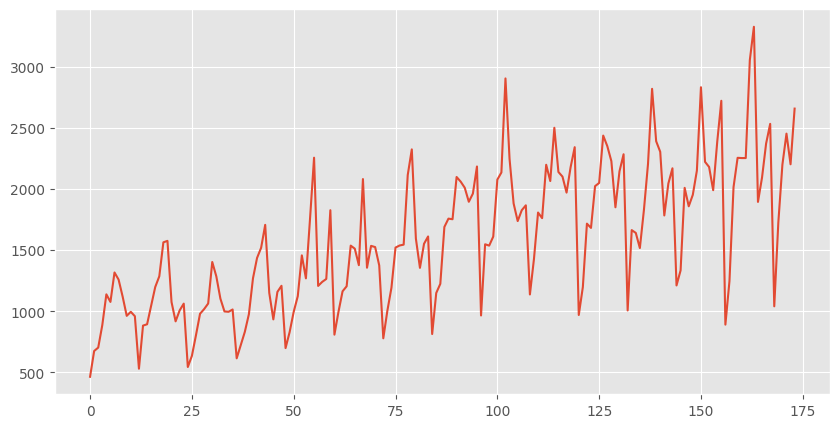

In [58]:
plt.figure(figsize=(10,5))
df['red'].plot();

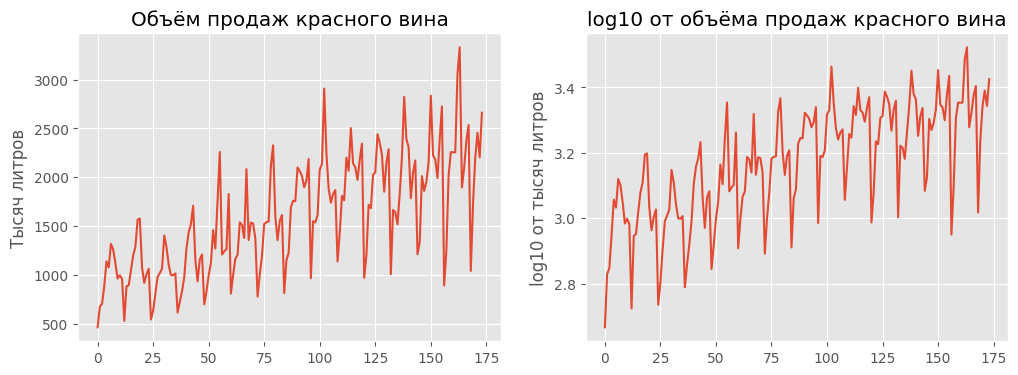

In [24]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
df['red'].plot(ax=ax1)
ax1.set_title(u'Объём продаж красного вина')
ax1.set_ylabel(u'Тысяч литров')

ax2 = fig.add_subplot(122)
pd.Series(np.log10(df['red'])).plot(ax=ax2)
ax2.set_title(u'log10 от объёма продаж красного вина')
ax2.set_ylabel(u'log10 от тысяч литров');

In [59]:
df['log_y'] = np.log10(df['red'])
df['month_num'] = range(1, len(df) + 1)

In [60]:
df = df.drop(columns=["red"])

In [61]:
df.head()

,month_,log_y,month_num
0,1,2.666518,1
1,2,2.829304,2
2,3,2.846955,3
3,4,2.947924,4
4,5,3.056524,5


In [62]:
for i in range(1, 13):
    month_col = f'm{str(i).zfill(2)}'
    df[month_col] = (df['month_'] == i).astype(int)

df

,month_,log_y,month_num,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,1,2.666518,1,1,0,0,0,0,0,0,0,0,0,0,0
1,2,2.829304,2,0,1,0,0,0,0,0,0,0,0,0,0
2,3,2.846955,3,0,0,1,0,0,0,0,0,0,0,0,0
3,4,2.947924,4,0,0,0,1,0,0,0,0,0,0,0,0
4,5,3.056524,5,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2,3.237544,170,0,1,0,0,0,0,0,0,0,0,0,0
170,3,3.342620,171,0,0,1,0,0,0,0,0,0,0,0,0
171,4,3.390051,172,0,0,0,1,0,0,0,0,0,0,0,0
172,5,3.343212,173,0,0,0,0,1,0,0,0,0,0,0,0


In [63]:
df = df.drop(columns=["month_"])

In [70]:
test_size = 8
total_size = len(df)

train_df = df.iloc[:total_size-test_size]
test_df = df.iloc[total_size-test_size:]

In [71]:
train_y = train_df['log_y']
train_X = train_df.drop(columns=["log_y", "m03"])

In [72]:
model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression()

In [73]:
coef = pd.DataFrame(list(zip(['intercept'] + train_X.columns.tolist(), [model.intercept_] + model.coef_.tolist())),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,2.898637
1,month_num,0.002447
2,m01,-0.196636
3,m02,-0.074081
4,m04,0.041762
5,m05,0.105663
6,m06,0.112260
7,m07,0.201381
8,m08,0.197796
9,m09,0.090774


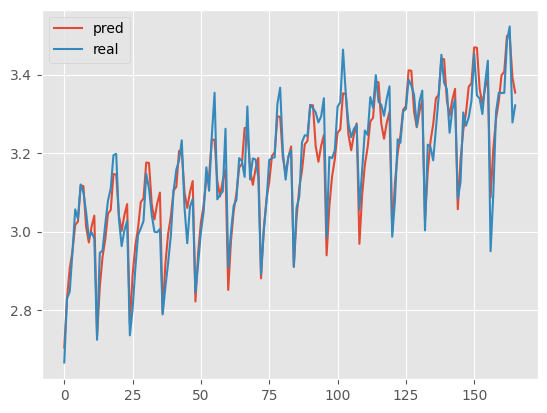

In [74]:
pred = pd.DataFrame({
    'pred': model.predict(train_X),
    'real': train_y})
pred.plot();

In [75]:
test_y = test_df['log_y']
test_X = test_df.drop(columns=["log_y", "m03"])

In [77]:
pred_y = model.predict(test_X)

In [78]:
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [79]:
calculate_mape(train_y, model.predict(train_X))

1.273493003548037

In [91]:
df_2 = pd.DataFrame()
df_2['month_num'] = range(174, 182)
df_2['month_'] = [7, 8, 9, 10, 11, 12, 1, 2]

In [92]:
for i in range(1, 13):
    month_col = f'm{str(i).zfill(2)}'
    df_2[month_col] = (df_2['month_'] == i).astype(int)

df_2

,month_num,month_,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,174,7,0,0,0,0,0,0,1,0,0,0,0,0
1,175,8,0,0,0,0,0,0,0,1,0,0,0,0
2,176,9,0,0,0,0,0,0,0,0,1,0,0,0
3,177,10,0,0,0,0,0,0,0,0,0,1,0,0
4,178,11,0,0,0,0,0,0,0,0,0,0,1,0
5,179,12,0,0,0,0,0,0,0,0,0,0,0,1
6,180,1,1,0,0,0,0,0,0,0,0,0,0,0
7,181,2,0,1,0,0,0,0,0,0,0,0,0,0


In [93]:
df_2 = df_2.drop(columns=["month_", "m03"])

In [94]:
model.predict(df_2)

array([3.52575869, 3.52462031, 3.42004437, 3.3807664 , 3.42135353,
       3.44920238, 3.14242199, 3.26742376])

In [96]:
y1 = 10**model.predict(df_2)

In [103]:
pred['forecast'] = np.nan

In [104]:
pred_2 = pd.DataFrame(model.predict(df_2), columns=['forecast'])
pred_2['real'] = np.nan
pred_2['pred'] = np.nan

In [105]:
pred_3 = pd.DataFrame({
    'pred': model.predict(test_X),
    'real': test_y})

pred_3['forecast'] = np.nan

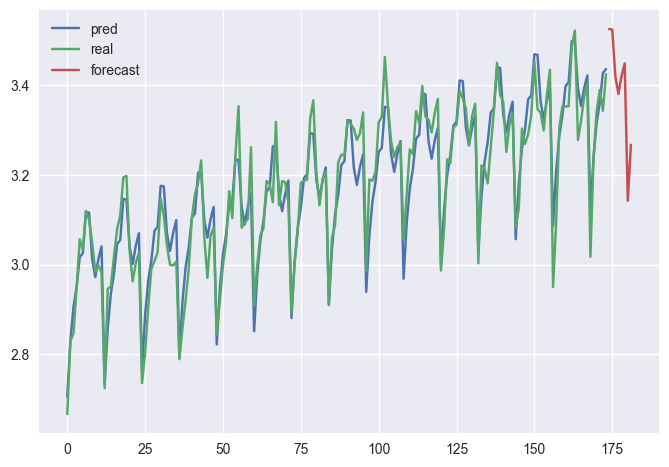

In [110]:
pred_4 = pd.concat(
    [pred, pred_3, pred_2],
    sort=False
).reset_index(drop=True)

pred_4.plot();

C:\Users\asmir\AppData\Local\Temp\ipykernel_2240\2909694108.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  matplotlib.style.use('seaborn')


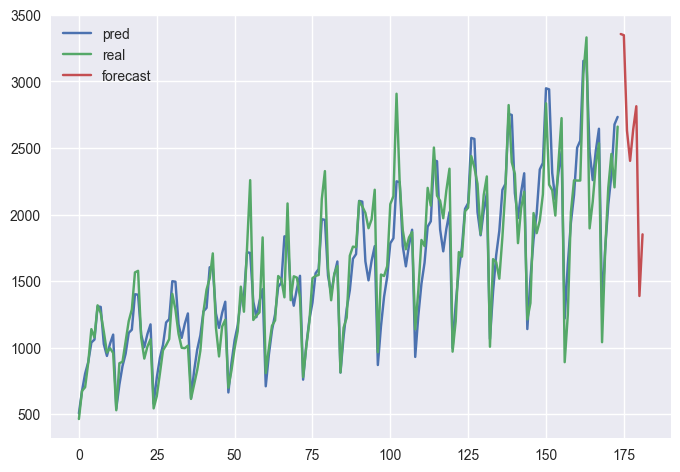

In [115]:
pred_5 = 10**pred_4
matplotlib.style.use('seaborn')
pred_5.plot();